In [1]:
import pandas as pd 
import re
import time
import requests
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import urllib.request
import urllib.error

In [2]:
# Read projects file  
df = pd.read_csv(r"useddata.csv", encoding ="utf-8") 

In [3]:
#Get rid of projects that don't have a half a year's worth of records ofter their end and where at least from 2017
dropList = []
for index, project in df.iterrows(): 
    endtime = datetime.strptime(project['end'], '%Y-%m-%d %H:%M:%S')
    if endtime > datetime.now()-timedelta(days = 365):
        df.drop(index, inplace=True)
    if endtime < datetime.now()-timedelta(days = (365*4)):
        df.drop(index, inplace=True)

In [45]:
#df.drop([1119,545,593,998,476,911,1124], inplace=True)
        
#df.drop([1271,984,669,1416,496,758,1219,422,1013,1023,589,1174,1152], inplace=True)

#df.drop([673,542,1266,577,891,727,993,492,503,445,1440,738,1265,1078,793,967,1044,377,704,1015], inplace=True)

#df.drop([1405,1070,1243,1231,918,1439,1026,860,1269,447,914,549,792,659,715,537,507,378,1400,1250], inplace=True)

#df.drop([778,1043,1257,1369,654,1379,677,826,736,449,1220,551,790,765,1144,539,509,403,1209,922], inplace=True)

#df.drop([1408,557,900,622,862,1411,1127,1253,745,555,1120,707,734,1029,505,958,695,852,473,640], inplace=True)

#df.drop([1336], inplace=True)
#df.drop([1236], inplace=True)
#df.drop([815,1074,571,716,859,705,1133,576,874,1029,431,963,561,443,654,423,437,598,516,735,1050,497,1230,725,677,1321,1389,1445,1096,461,750,587], inplace=True)
#df.drop([779,786,706,1391,934,1051,1295,766,810,1098,1431,378,983,754,848,784,1352,504,764,989,1004,737,603,456,778,1211,582,700,707,1215,544,430,832,1048,1142,860,1156,529,486,474,1443,1440,481,1409,1158,445,1302,552,697,933,1365,1330,490,500,476,974], inplace=True)
df.drop([644,892,789,637,1252,515,1286,1202], inplace=True)

In [25]:
projectSample = df.sample(n=100, random_state=1)

In [26]:
projectSample = projectSample.sort_values(by=['observers'])

In [46]:
#projectSample.drop([815,1074,571,716,859,705,1133,576,874,1029,431,963,561,443,654,423,437,598,516,735,1050,497,1230,725,677,1321,1389,1445,1096,461,750,587], inplace=True)
#projectSample.drop([779,786,706,1391,934,1051,1295,766,810,1098,1431,378,983,754,848,784,1352,504,764,989,1004,737,603,456,778,1211,582,700,707,1215,544,430,832,1048,1142,860,1156,529,486,474,1443,1440,481,1409,1158,445,1302,552,697,933,1365,1330,490,500,476,974], inplace=True)
projectSample.drop([644,892,789,637,1252,515,1286,1202], inplace=True)

In [47]:
projectSample['observers']

1121    1109
1393    1730
1041    2149
1116    7028
Name: observers, dtype: int64

In [48]:
projectSample

,Unnamed: 0,Unnamed: 0.1,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,...,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start,latitude,longitude
1121,1277,177,2019-04-10T16:26:45+00:00,BioBlitz project of area adjacent to ECMS cond...,2 days 00:00:00.000000000,2019-04-23 17:31:00,48.000000,1452,False,"30.6184688456,-86.1715163088",...,38557,NaN,collection,[],"[{'field': 'place_id', 'value': [2805], 'value...",ecms-gifted-6th-bioblitz,1906,2019-04-21 17:31:00,30.618469,-86.171516
1393,1594,494,2019-09-10T14:32:55-05:00,What plants can we document during a single we...,7 days 23:58:00.000000000,2019-10-27 23:59:00,191.966667,602,False,"31.4472169582,-99.3171370395",...,49990,NaN,collection,"[{'field': 'photos', 'value': True}, {'field':...","[{'field': 'photos', 'value': True, 'value_boo...",wild-plants-of-texas-npsot-challenge-bioblitz-...,1618,2019-10-20 00:01:00,31.447217,-99.317137
1041,1182,82,2018-10-30T18:09:07+00:00,"Join in one of the <a href=""https://www.calaca...",3 days 00:00:00.000000000,2019-04-29 00:00:00,72.000000,1412,False,"37.8786225,-122.4203475",...,29624,NaN,collection,"[{'field': 'd1', 'value': '2019-04-26'}, {'fie...","[{'field': 'd1', 'value': '2019-04-26', 'value...",city-nature-challenge-2019-san-francisco-bay-area,3142,2019-04-26 00:00:00,37.878622,-122.420348
1116,1272,172,2019-04-09T00:01:27+00:00,discover yoour backyard on may day,1 days 00:01:00.000000000,2019-05-02 17:01:00,24.016667,3125,False,"45.9643322098,-113.2690112346",...,38428,NaN,collection,"[{'field': 'd1', 'value': '2019-05-01 17:00 -0...","[{'field': 'd1', 'value': '2019-05-01T17:00:00...",may-day-bioblitz,5646,2019-05-01 17:00:00,45.964332,-113.269011


In [8]:
# Fetch the observations for a project, but restrict it by the dates of that project, because projects often have observations
# added to them outside of the official dates of the project.
# We want to only to catch the people who participated in the event.

def fetchObservations(projectID,start,end):
    page = int(1)
    num_pages = 1
    obsers = pd.DataFrame()
    q = {
        "per_page": 50,
         "page": 1,
        "d1": start.strftime('%Y-%m-%d'),
        "d2": end.strftime('%Y-%m-%d'),
    }
    url = "https://api.inaturalist.org/v1/observations/observers?project_id="
    while True:
        r = requests.get(url+str(projectID), params=q)
        obsers = pd.concat([obsers, pd.DataFrame(r.json()["results"])], sort=False)
        if page > num_pages:
          break
        if page == 1:
            num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
            print('number of pages of observations in project '+str(projectID)+' = '+str(num_pages))
            print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
        print("Retrieving page ", url+" page " + str(page))
        page += 1
        q["page"] = page
        time.sleep(1) # just to slow it down a bit
    return(obsers)

In [9]:
def fetchObservers(projectID,start,end):
    observationsInTheProject = fetchObservations(projectID,start,end)
    setOfObservers = set()
    #print(type(observationsInTheProject))
    #for index in observationsInTheProject:
    for index, row in observationsInTheProject.iterrows(): 
        setOfObservers.add(row['user_id'])
    print("Number of observers retrieved = "+str(len(setOfObservers)))
    return(setOfObservers)

In [10]:
#just picks up the first page of 50 observations
def fetchObservationsPersonTime(userID,start,end):
    page = int(1)
    num_pages = 1
    observations = pd.DataFrame()
    q = {
        "per_page": 100,
         "page": 1,
    }
    url = "https://api.inaturalist.org/v1/observations?user_id="
    while True:
        r = requests.get(url+str(userID)+'&d1='+start.strftime('%Y-%m-%d')+'&d2='+end.strftime('%Y-%m-%d')+'&order=desc&order_by=created_at', params=q)   
        if "results" in r.json():
            observations = pd.concat([observations, pd.DataFrame(r.json()["results"])], sort=False)
        if page > num_pages:
          break
        if page == 1:
            num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
            print('    Number of pages of person observations for user '+str(userID)+' = '+str(num_pages))
            print("    Observations:", r.json()["total_results"], ", ", num_pages, " pages total")
        print("    Retrieving page of observations", url+" page " + str(page))
        page += 1
        q["page"] = page
        time.sleep(2) # just to slow it down a bit
    #return(observations.json()["results"])
    return(observations)

In [49]:
projectBeginning = datetime.min
projectEnding = datetime.min
firstDate = datetime.now()
lastdate = datetime.now()
span = timedelta(days=365)

results = pd.DataFrame(columns=['projectID', 'userID', 'eventDate', 'recordDate', 'daysRelative'])

for column_name, item in projectSample.iterrows():
    #print(item['end'])
    
    projectBeginning = datetime.strptime(item['start'],'%Y-%m-%d %H:%M:%S')
    projectEnding = datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')
    observers = fetchObservers(item['projectID'],projectBeginning,projectEnding)
    #print(observers)
    for person in observers:
        obs = fetchObservationsPersonTime(person,projectEnding-span,projectEnding+span)
        #for record in obs: 
        for index, record in obs.iterrows():
            #print(item['end'])
            if not record['observed_on_details'] is None:
                #print(record['observed_on_details']['date'])
                #print((datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')-datetime.strptime(record['observed_on_details']['date'],'%Y-%m-%d')).days)
                dfTemp = pd.DataFrame({"projectID":item['projectID'], "userID":person,
                                   "eventDate":item['end'], "recordDate":record['observed_on_details']['date'],
                                   "daysRelative":[(datetime.strptime(record['observed_on_details']['date'],'%Y-%m-%d')-datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')).days]})
                results = results.append(dfTemp, ignore_index=True)

number of pages of observations in project 38557 = 1
Results: 3 ,  1  pages total
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 1
Number of observers retrieved = 3
    Number of pages of person observations for user 2803289 = 1
    Observations: 18 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1905730 = 7
    Observations: 626 ,  7  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retriev

Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 16
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 17
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 18
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 19
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 20
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 21
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 22
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 23
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 24
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 25
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 26

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 1566753 = 2
    Observations: 188 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 1167397 = 3
    Observations: 215 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 2263082 = 1
    Observations: 47 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pag

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 68
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 71
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 72
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 147
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 148
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 149
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 150
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 151
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 152
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 153
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 154
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 155
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 156
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 231
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 232
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 233
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 234
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 235
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 236
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 237
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 238
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 239
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 240
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Number of pages of person observations for user 2347077 = 1
    Observations: 7 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2385993 = 1
    Observations: 21 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 415818 = 4
    Observations: 319 ,  4  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving p

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations ht

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 98
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 99
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 100
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 101
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 102
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 103
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 104
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 105
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 106
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 107
    Retrieving page of

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Number of pages of person observations for user 157927 = 1
    Observations: 31 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 706794 = 7
    Observations: 642 ,  7  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations ht

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Number of pages of person observations for user 2304396 = 2
    Observations: 171 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 2363789 = 1
    Observations: 13 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1347989 = 59
    Observations: 5893 ,  59  pages total
    Retrie

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Number of pages of person observations for user 2380193 = 1
    Observations: 34 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 729506 = 7
    Observations: 645 ,  7  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of 

    Number of pages of person observations for user 2177491 = 2
    Observations: 135 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 2392536 = 1
    Observations: 11 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2292184 = 1
    Observations: 20 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 772582 = 37
    Observations: 3667 ,  37  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retr

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 40
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observa

    Number of pages of person observations for user 297496 = 15
    Observations: 1437 ,  15  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Number of pages of person observations for user 2296407 = 1
    Observations: 20 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 762456 = 3
    Observations: 269 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of

    Number of pages of person observations for user 1954441 = 1
    Observations: 40 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 451214 = 28
    Observations: 2712 ,  28  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Number of pages of person observations for user 111285 = 42
    Observations: 4123 ,  42  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of o

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Number of pages of person observations for user 707272 = 1
    Observations: 97 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1254089 = 2
    Observations: 156 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 496331 = 2
    Observations: 167 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving p

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 40
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Number of pages of person observations for user 793333 = 4
    Observations: 392 ,  4  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Number of pages of person observations for user 2255611 = 1
    Observations: 20 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 56
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 57
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 58
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 59
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 60
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Number of pages of person observations for user 2378614 = 1
    Observations: 23 ,  1  pages total
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observat

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 1973157 = 1
    Observations: 28 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2214827 = 2
    Observations: 197 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 2378670 = 1
    Observations: 9 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2292655 = 1
    Observations: 8 ,  1  pages total
    Retrievin

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Number of pages of person obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 40
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Number of pages of person 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 51
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 52
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 53
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 54
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations h

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Number of pages of person observations for user 2217118 = 2
    Observations: 134 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 971934 = 2
    Observations: 196 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages o

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 71
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 72
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 73
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 74
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 75
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 76
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 77
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 78
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Number of pages of person observations for user 824523 = 1
    Observations: 85 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1234132 = 3
    Observations: 235 ,  3  pages total
    Retrieving page of obs

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Number of pages of person observations for user 48418 = 136
    Observations: 13596 ,  136  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 84
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 90
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 92
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 93
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Number of pages of person observations for user 240973 = 6
    Observations: 540 ,  6  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observatio

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 55
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 56
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 57
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 58
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 59
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 60
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 1045980 = 1
    Observations: 10 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2289135 = 2
    Observations: 125 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 470513 = 3
    Observations: 271 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of page

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 71
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 72
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 73
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 74
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 75
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 76
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 77
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 78
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 153
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 154
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 155
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 156
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 157
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 158
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 159
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 160
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 161
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 162
    Number of pages 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 58
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 59
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 60
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 143
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 144
    Number of pages of person observations for user 650766 = 1
    Observations: 74 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 220689 = 15
    Observations: 1476 ,  15  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 68
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations h

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 51
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 52
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Number of pages of person observations for user 2201184 = 2
    Observations: 134 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 2328164 = 1
    Observations: 58 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1635941 = 2
    Observations: 108 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 91751 = 17
    Observations: 1665 ,  17  pages total
    Retr

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Number of pages of person observations for user 143067 = 94
    Observations: 9388 ,  94  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 82
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 83
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 84
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 90
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 51
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations ht

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Number of pages of person observations for user 892736 = 3
    Observations: 247 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observatio

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Number of pages of person observations for user 1296229 = 8
    Observations: 796 ,  8  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 51
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 52
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 53
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 54
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 55
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 56
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 57
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 58
    Retrieving page of observa

    Number of pages of person observations for user 354260 = 3
    Observations: 290 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 2346965 = 1
    Observations: 13 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 542677 = 11
    Observations: 1098 ,  11  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving p

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Number of pages of person observations for user 139257 = 45
    Observations: 4482 ,  45  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observ

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 40
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observatio

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Number of pages of person observations for user 395294 = 19
    Observations: 1877 ,  19  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Number of pages of person observations for user 1687610 = 1
    Observations: 32 ,  1  pages total
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Number of pages of person observations for user 481366 = 15
    Observations: 1461 ,  15  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of obse

MemoryError: 

In [50]:
grpedResults = results.groupby(['projectID','userID','daysRelative']).count().reset_index()
#grpedResults = results.groupby('daysRelative').userID.count()

In [51]:
plt.style.use('seaborn-whitegrid')

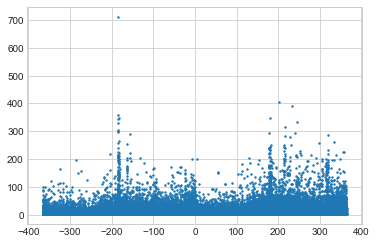

In [52]:
plt.scatter(grpedResults["daysRelative"],grpedResults["recordDate"], s=2)

In [53]:
grpedResults.to_csv('projects-951121,1393,1041,1116.csv')

In [54]:
after = grpedResults[grpedResults['daysRelative']>0]

In [55]:
before = grpedResults[grpedResults['daysRelative']< -10]

In [56]:
before.head()

,projectID,userID,daysRelative,eventDate,recordDate
0,29624,1,-365,13,13
1,29624,1,-359,33,33
2,29624,1,-358,20,20
3,29624,1,-355,2,2
4,29624,1,-353,4,4


In [57]:
before.groupby(['userID']).count().reset_index().describe()

,userID,projectID,daysRelative,eventDate,recordDate
count,4.900000e+02,490.000000,490.000000,490.000000,490.000000
mean,1.106917e+06,53.710204,53.710204,53.710204,53.710204
std,8.429092e+05,59.102020,59.102020,59.102020,59.102020
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,3.018702e+05,8.250000,8.250000,8.250000,8.250000
50%,9.274100e+05,31.000000,31.000000,31.000000,31.000000
75%,2.000542e+06,79.000000,79.000000,79.000000,79.000000
max,2.803289e+06,276.000000,276.000000,276.000000,276.000000


In [58]:
after.groupby(['userID']).count().reset_index().describe()

,userID,projectID,daysRelative,eventDate,recordDate
count,5.090000e+02,509.000000,509.000000,509.000000,509.000000
mean,1.138289e+06,69.308448,69.308448,69.308448,69.308448
std,8.563810e+05,76.172393,76.172393,76.172393,76.172393
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,3.044940e+05,9.000000,9.000000,9.000000,9.000000
50%,9.828660e+05,40.000000,40.000000,40.000000,40.000000
75%,2.138287e+06,110.000000,110.000000,110.000000,110.000000
max,2.803289e+06,338.000000,338.000000,338.000000,338.000000
